<a href="https://colab.research.google.com/github/mwkinne/testMath254/blob/Statistical-Modeling-Homework/Logistic_Regression_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
mydata <- read.csv('https://raw.githubusercontent.com/gitcnk/Data/master/MedSchoolApplicants.csv',
                    stringsAsFactors = TRUE)


In [5]:
names(mydata)
head(mydata)

[1] "Accept"      "Accept_code" "Sex"         "BCPM"        "GPA"        
 [6] "VR"          "PS"          "WS"          "BS"          "MCAT"       
[11] "Apps"

,Accept,Accept_code,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,D,0,F,3.59,3.62,11,9,9,9,38,5
2,A,1,M,3.75,3.84,12,13,8,12,45,3
3,A,1,F,3.24,3.23,9,10,5,9,33,19
4,A,1,F,3.74,3.69,12,11,7,10,40,5
5,A,1,F,3.53,3.38,9,11,4,11,35,11
6,A,1,M,3.59,3.72,10,9,7,10,36,5


## This is the HW for Thursday!  

The goal is to build a model to predict the acceptance to medical school based on servaral predictors.

The Medical College Admissions Test (MCAT) has four sections:
- Verbal Reasoning (VR)
- Physical Sciences (PS)
- Biological Sciences (BS)
- Writing Sample (WS)

Q1: Explore the distribution of GPA values for Accepted and Denied candidates


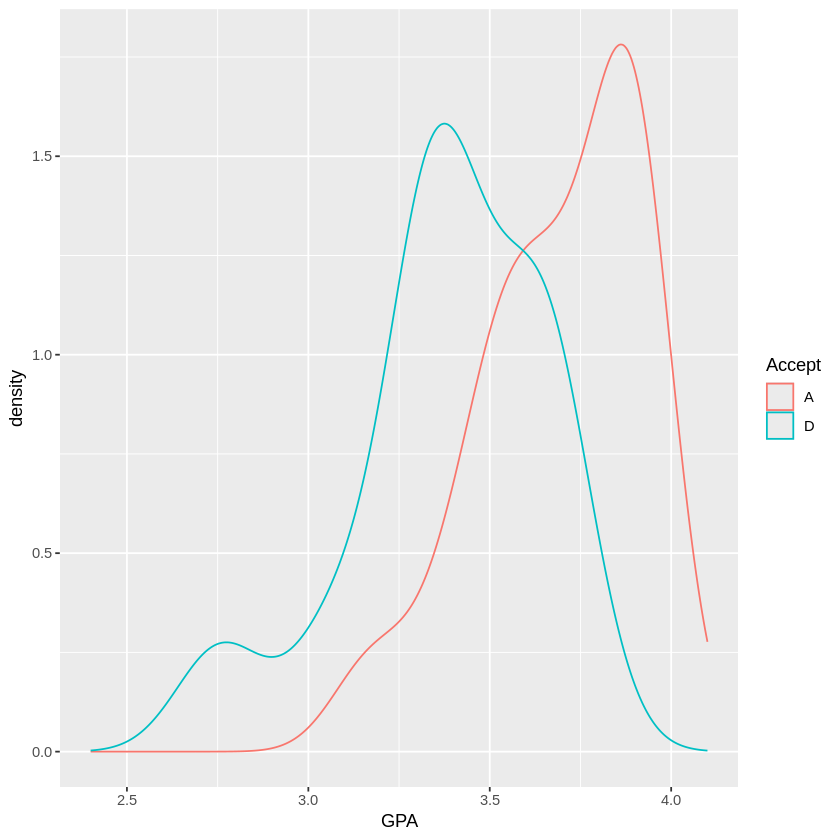

In [6]:
mydata %>%
  ggplot() +
  aes( x = GPA, col = Accept) +
  geom_density() +
  xlim(c(2.4,4.1))

The distribution above indicates that there may be a higher acceptance rate with higher GPA values.


Q2: Explore the distribution of MCAT values for cccepted and denied candidates.





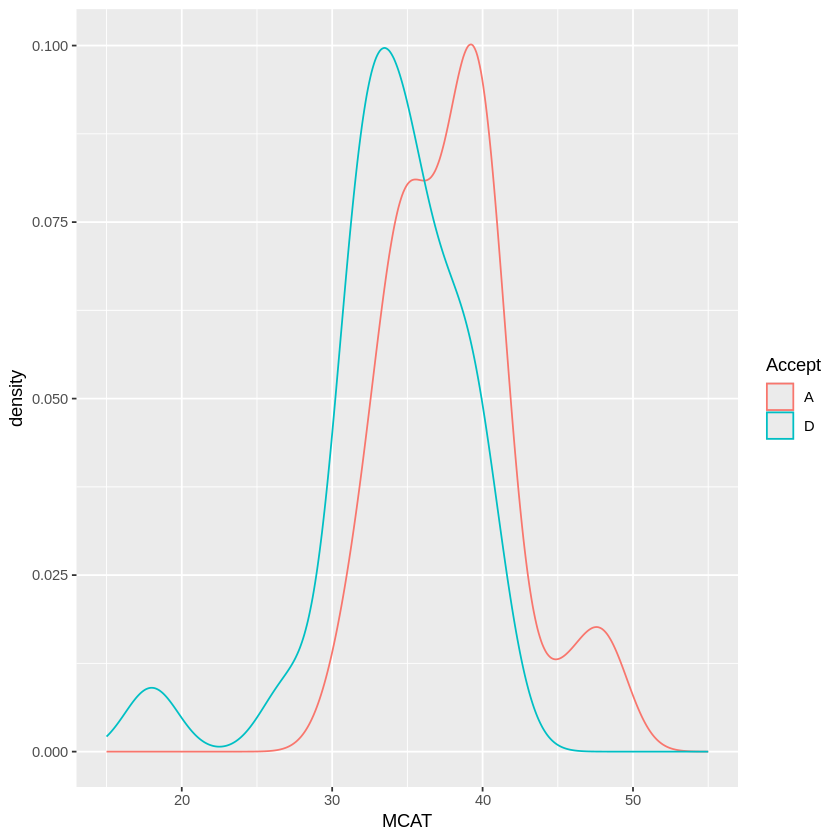

In [7]:
mydata %>%
  ggplot() +
  aes( x = MCAT, col = Accept) +
  geom_density() +
  xlim(c(15,55))

The distribution above indicates that there may be a higher acceptance rate with higher MCAT scores, yet the deviation in the two is seemingly less than that of GPA and acceptance.

Q3: Explore the distribution of number of applications submitted for Accepted and Denied candidates



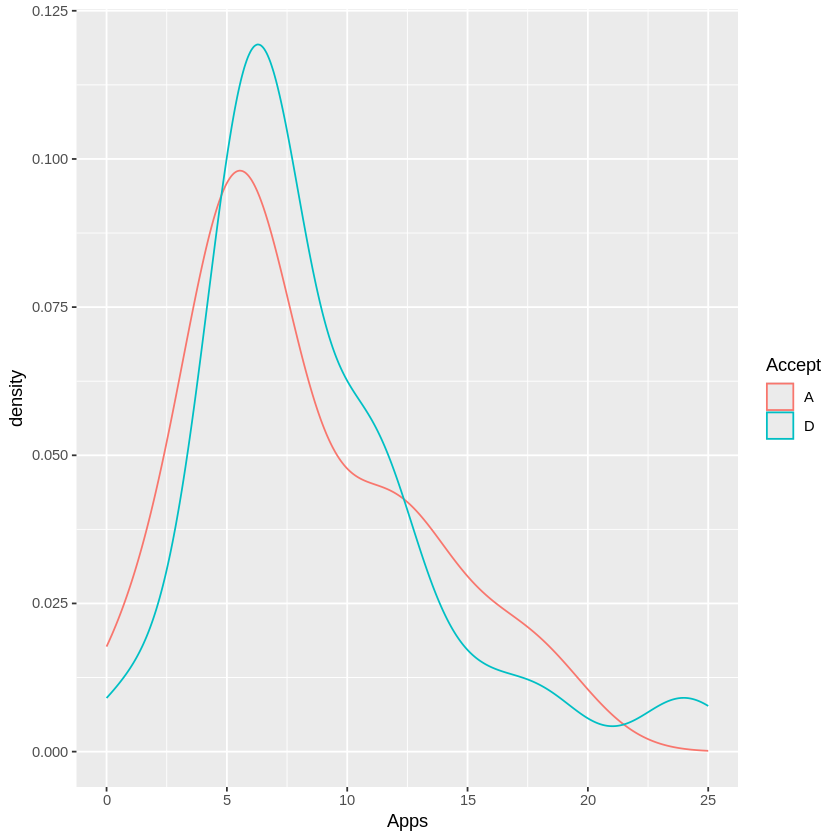

In [8]:
mydata %>%
  ggplot() +
  aes( x = Apps, col = Accept) +
  geom_density() +
  xlim(c(0,25))

The distribution above indicates that there may be a higher acceptance rate for those who have submitted roughly 12 or more applications. The inflection point of the acceptance and denial distribution lies around 12-13 applications.

Q4: Is there a correlation beteween GPA values and MCAT values for Accepted and Denied candidates?  
**Hint:** Use a scatterplot.

Q5: Is this relationship similar(or different) for males and females.  
**Hint:** Use facets.


`geom_smooth()` using formula = 'y ~ x'


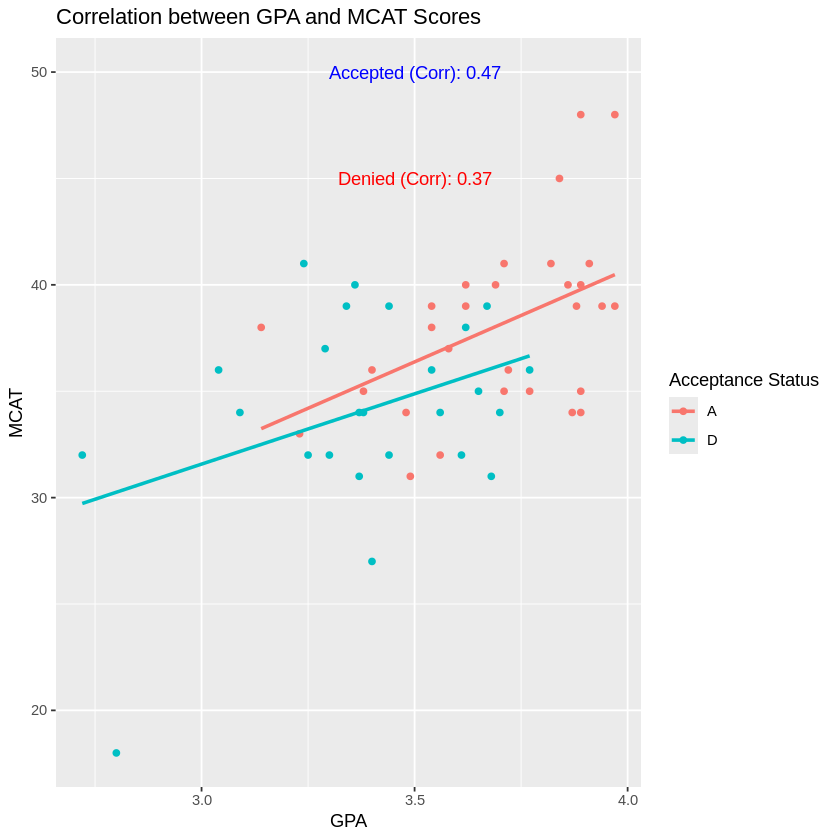

In [9]:
cor_accepted <- cor(mydata$GPA[mydata$Accept == "A"], mydata$MCAT[mydata$Accept == "A"])
cor_denied <- cor(mydata$GPA[mydata$Accept == "D"], mydata$MCAT[mydata$Accept == "D"])

mydata %>%
  ggplot(aes(x = GPA, y = MCAT, color = Accept)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Correlation between GPA and MCAT Scores",
       x = "GPA",
       y = "MCAT",
       color = "Acceptance Status") +
  annotate("text", x = 3.5, y = 50, label = paste("Accepted (Corr):", round(cor_accepted, 2)), color = "blue") +
  annotate("text", x = 3.5, y = 45, label = paste("Denied (Corr):", round(cor_denied, 2)), color = "red")

There is a higher correlation between MCAT scores and GPA for those who were accepted (roughly 0.1). Visually, the graph shows that those with higher MCAt scores tend to have higher GPA's as well. There is a large cluster of accepted data points with over 40 on the MCAt and above a 3.5 GPA.

[1] "Male Correlation"
[1] 0.5624715
[1] "Female Correlation"
[1] 0.50972


`geom_smooth()` using formula = 'y ~ x'


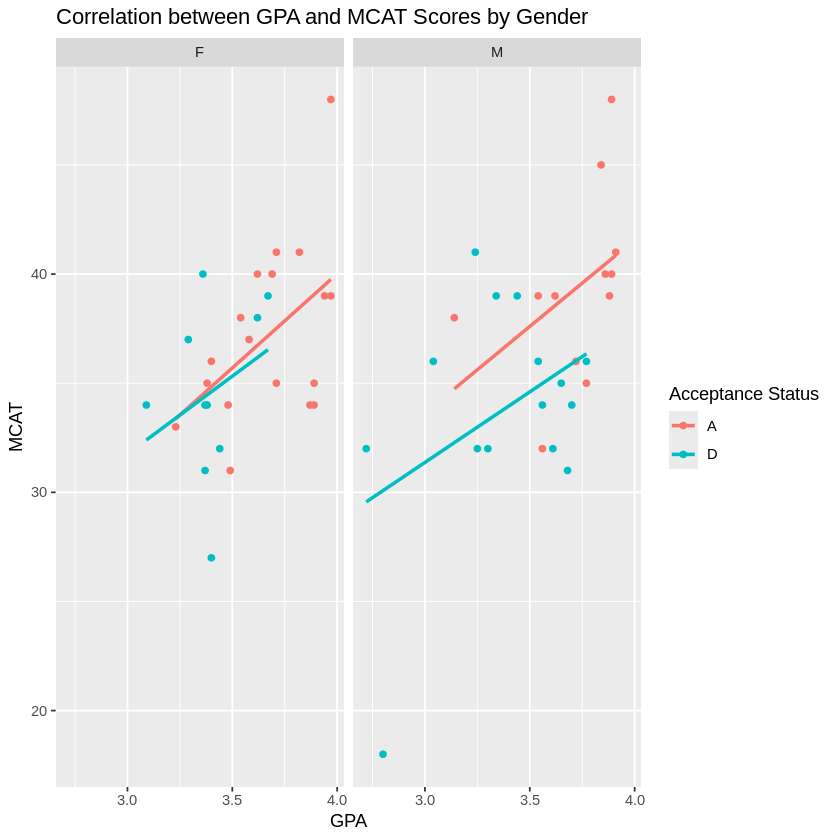

In [10]:
print("Male Correlation")
print(cor(mydata$GPA[mydata$Sex == "M"], mydata$MCAT[mydata$Sex == "M"]))
print("Female Correlation")
print(cor(mydata$GPA[mydata$Sex == "F"], mydata$MCAT[mydata$Sex == "F"]))

mydata %>%
  ggplot(aes(x = GPA, y = MCAT, color = Accept)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Correlation between GPA and MCAT Scores by Gender",
       x = "GPA",
       y = "MCAT",
       color = "Acceptance Status") +
  facet_wrap(~Sex)

Separating by gender, there does not seem to be as much of a correlation for women relative to men. The men have a large amount of accepted individuals who hold high GPA's and MCAt scores, whereas those who were rejected tend to have lower GPA's and MCAT scores. Females are not as obvious. The accepted and denied females are more mixed, and do not show a correlation between MCAT and GPA scores for those who were accepted vs denied.

Q6: Draw a plot to explore the relationship between GPA and acceptance.  Add the logistic regression curve into the plot.

`geom_smooth()` using formula = 'y ~ x'


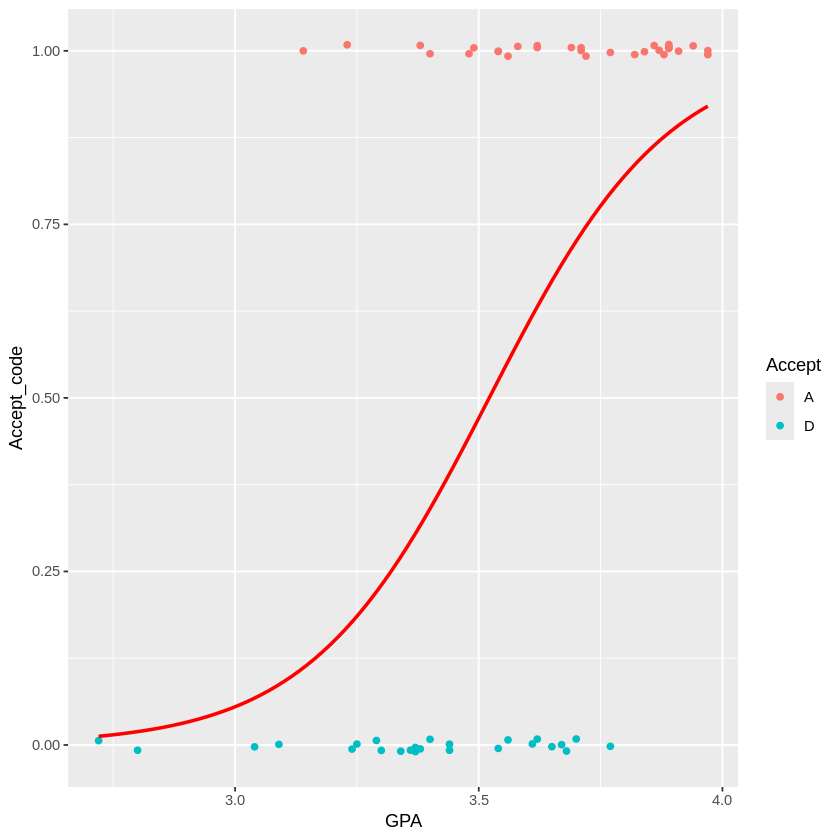

In [11]:
mydata %>%
ggplot() +
  aes(x = GPA, y = Accept_code, col = Accept) +
  geom_jitter(height = 0.01, width = 0) +
  geom_smooth(method = 'glm',
              method.args = list(family = 'binomial'),
              se = FALSE ,
              col = 'red' ,
              fullrange = TRUE)


Q7: Is the probability of acceptance based on GPA is similar(or different) for males and females?

`geom_smooth()` using formula = 'y ~ x'


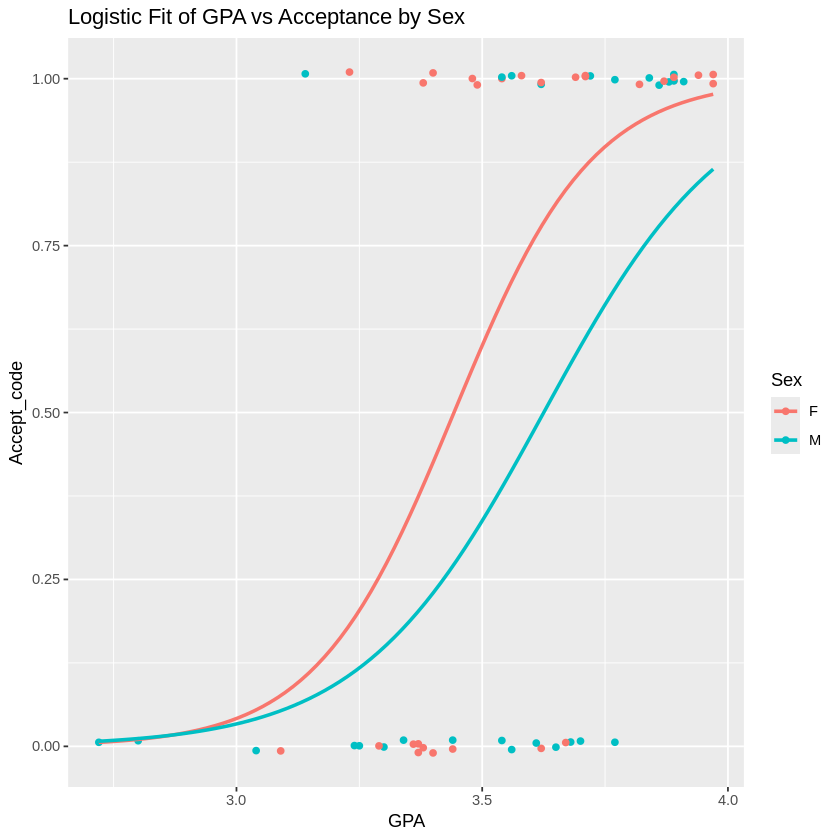

In [13]:
mydata %>%
ggplot() +
  aes(x = GPA, y = Accept_code, col = Sex) +
  geom_jitter(height = 0.01, width = 0) +
  geom_smooth(method = 'glm',
              method.args = list(family = 'binomial'),
              se = FALSE ,
              fullrange = TRUE) +
  labs(
  title = 'Logistic Fit of GPA vs Acceptance by Sex'
  )


The plot above shows that there is a difference in acceptance rate based on GPA between females and males. The probability of acceptance is lower for males than females, based on the logistic regression plot above.

Q8: Use the `glm()` command to fit a logistic model to predict the acceptance probability usinig `GPA` and `Sex` as predictors

In [15]:
model2 <- glm(Accept_code ~ GPA + Sex + GPA*Sex, data = mydata)
summary(model2)


Call:
glm(formula = Accept_code ~ GPA + Sex + GPA * Sex, data = mydata)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -3.3680     1.2093  -2.785  0.00749 **
GPA           1.1211     0.3373   3.324  0.00165 **
SexM          0.9423     1.5076   0.625  0.53474   
GPA:SexM     -0.3076     0.4223  -0.728  0.46964   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.1811253)

    Null deviance: 13.6364  on 54  degrees of freedom
Residual deviance:  9.2374  on 51  degrees of freedom
AIC: 67.959

Number of Fisher Scoring iterations: 2


Q9: Write down equations of the two fitted logistic curves.

$f(x)_{males} = \frac{e^{-2.4257 + 0.8135(GPA)}}{1+e^{-2.4257 + 0.8135(GPA)}}$



$f(x)_{females} = \frac{e^{-3.368 + 1.1211(GPA)}}{1+e^{-3.368 + 1.1211(GPA)}}$

Q10: What is the $R^2$ of your model?  Do you see one in your model output?

The $R^2$ value is the $\frac{simplesterror - proposed error}{simplest error}$

simplest error: Null devience
proposed error: Residual error

$R^2 = 0.3226$